# Multiproduct Monopolist

In [1]:
import numpy as np
import pandas as pd
from scipy import sparse
from math import sqrt, ceil
from timeit import default_timer as timer
from datetime import timedelta
import sys
sys.path.append('..')
from modules import PAP

## Setting 1

In [2]:
### Types setting
n0, n1 = 5, 5
theta0, theta1 =  np.linspace(1,2,num=n0, dtype=np.float32), np.linspace(1,2,num=n1, dtype=np.float32)  #  [1, 1.5, 3], [0, 0.5, 1]
theta0, theta1 = np.meshgrid(theta0,theta1)
theta = np.stack((theta0.flatten(), theta1.flatten())); N = theta.shape[-1]     # number of types

f = np.ones(N, dtype=np.float32).flatten()    # weights of the distribution

### Model parameters setting
param = {'constrained':False}   # boolean for the constraint y >= 0

### Objects
model = PAP(theta, f, param)

model id = PAP_N25_2024-07-11_10-02-13



## Direct resolution (with all the constraints)

convergence = True, iterations = 392, elapsed time = 0:00:00.318007
primal residual = 9.46e-01 tol, dual residual = 1.09e-01 tol
primal-dual gap = 8.76e-05, optimal value - current value < 2.16e-06 optimal value


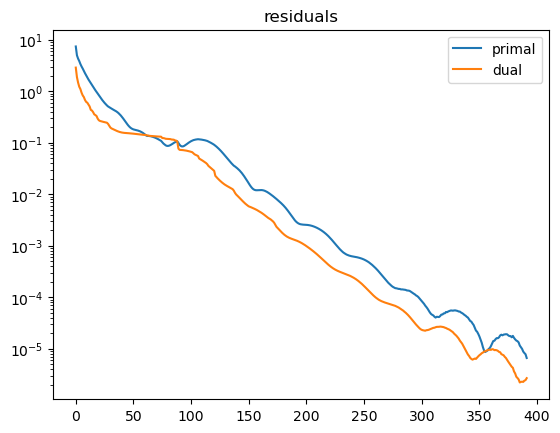

In [3]:
model.all()
model.solve(stepratio=N/2, it_max=1e4, tol_primal=1e-6, tol_dual=1e-6, scale=True,) #path='results/'+model.id
model.residuals(title='residuals')

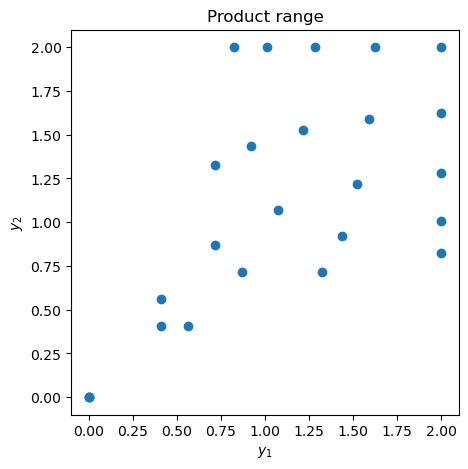

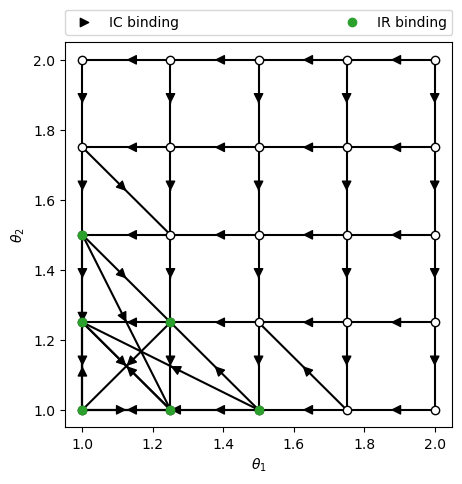

In [4]:
model.range(title='Product range', )# path='results/'+model.id+'_products_perturbed')
model.constraints() #path='results/'+model.id+'_constraints_perturbed')

## Setting 2

In [8]:
### Types setting

## Random types
# N = 10
# rng = np.random.default_rng()
# mu = 1.5; sigma2 = 1; rho = 0
# theta = rng.multivariate_normal(mu*np.array([1, 1]),sigma2*np.array([[1, rho], [rho,1]]),N).T

n0, n1 = 5, 5
theta0, theta1 =  np.linspace(1,2,num=n0, dtype=np.float32), np.linspace(1,2,num=n1, dtype=np.float32)  #  [1, 1.5, 3], [0, 0.5, 1]
theta0, theta1 = np.meshgrid(theta0,theta1)
theta = np.stack((theta0.flatten(), theta1.flatten())); N = theta.shape[-1]     # number of types
## random perturbation
rng = np.random.default_rng(2024)
theta = theta + rng.normal(0, 0.05, (2,N)) 

f = np.ones(N, dtype=np.float32).flatten()    # weights of the distribution

### Model parameters setting
param = {'constrained':False}   # boolean for the constraint y >= 0

### Objects
model = PAP(theta, f, param)

model id = PAP_N25_2024-07-11_10-06-04



## Direct resolution (with all the constraints)

convergence = True, iterations = 1430, elapsed time = 0:00:00.831675
primal residual = 9.98e-01 tol, dual residual = 1.99e-01 tol
primal-dual gap = 4.11e-05, optimal value - current value < 9.93e-07 optimal value


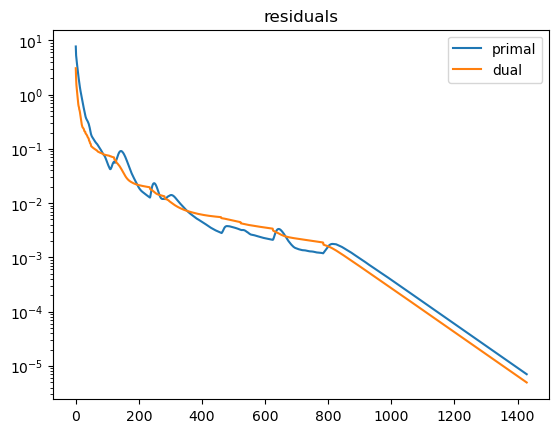

In [9]:
model.all()
model.solve(stepratio=N/2, it_max=1e4, tol_primal=1e-6, tol_dual=1e-6, scale=True,) #path='results/'+model.id
model.residuals(title='residuals')

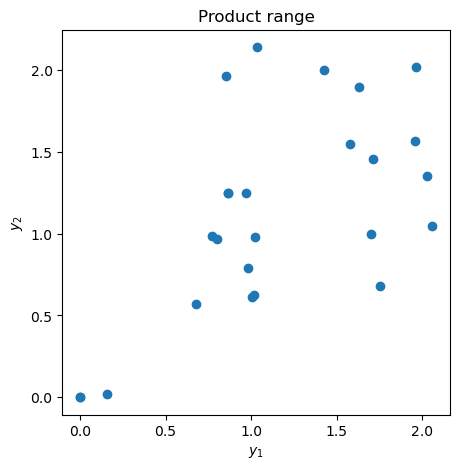

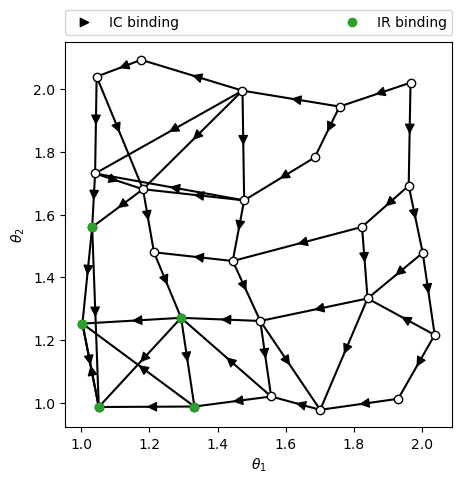

In [10]:
model.range(title='Product range', )# path='results/'+model.id+'_products_perturbed')
model.constraints() #path='results/'+model.id+'_constraints_perturbed')

## Setting 3

In [5]:
### Types setting
n0, n1 = 20, 20
theta0, theta1 =  np.linspace(1,2,num=n0, dtype=np.float32), np.linspace(1,2,num=n1, dtype=np.float32)  #  [1, 1.5, 3], [0, 0.5, 1]
theta0, theta1 = np.meshgrid(theta0,theta1)
theta = np.stack((theta0.flatten(), theta1.flatten())); N = theta.shape[-1]     # number of types

f = np.ones(N, dtype=np.float32).flatten()    # weights of the distribution

### Model parameters setting
param = {'constrained':False}   # boolean for the constraint y >= 0

### Objects
model = PAP(theta, f, param)

model id = PAP_N400_2023-09-28_14-43-47



## Adaptative approach (starting with the local constraints)

In [6]:
kmax = ceil(sqrt(N))+1
t_start = timer()
model.local(); k = 0; test = np.array([False,False])
while np.all(test==False):
    k += 1
    print(f'OPTIMIZATION {k}: {len(model.indices)} IC constraints')
    model.solve(warmstart=True, it_max = 1e5, stepratio=len(model.indices),) # path='results/'+model.id) #sqrt(len(model.indices))
    # model.residuals()
    print(f'IC constraints: {len(model.IC_binding)} binding, {len(model.IC_violated)} violated\n')
    # model.indices = sorted(set(model.indices).union(model.IC_violated))
    model.indices = sorted(set(model.indices).union(set(model.IC_violated).intersection(model.ind_local(k*ceil(sqrt(N))))))
    model.local(model.indices)
    test = np.array([k==kmax, len(model.IC_violated)==0])
elapsed = timer() - t_start
print(f'elapsed time = {str(timedelta(seconds=elapsed))}')

OPTIMIZATION 1: 760 IC constraints
convergence = True, iterations = 25, elapsed time = 0:00:00.158624
primal residual = 6.34e-01 tol, dual residual = 2.36e-02 tol
primal-dual gap = 7.76e-02, optimal value - current value < 1.26e-04 optimal value
IC constraints: 760 binding, 3768 violated

OPTIMIZATION 2: 1143 IC constraints
convergence = True, iterations = 6219, elapsed time = 0:00:04.078651
primal residual = 1.00e+00 tol, dual residual = 1.43e-01 tol
primal-dual gap = 4.73e-03, optimal value - current value < 7.71e-06 optimal value
IC constraints: 969 binding, 72 violated

OPTIMIZATION 3: 1187 IC constraints
convergence = True, iterations = 2479, elapsed time = 0:00:01.203598
primal residual = 1.00e+00 tol, dual residual = 1.05e-01 tol
primal-dual gap = 1.06e-03, optimal value - current value < 1.72e-06 optimal value
IC constraints: 980 binding, 6 violated

OPTIMIZATION 4: 1193 IC constraints
convergence = True, iterations = 1711, elapsed time = 0:00:00.612447
primal residual = 9.99e-

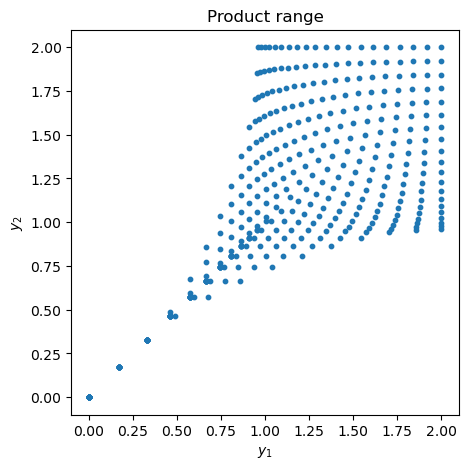

In [7]:
model.range(title='Product range', s=10, path='results/'+model.id)
# model.constraints()